## Importing necessary libraries and dataset

In [3]:
!pip install contractions
!pip install nltk
!pip install autocorrect 
!pip install --upgrade matplotlib

  Using cached contractions-0.1.73-py2.py3-none-any.whl (8.7 kB)
  Using cached autocorrect-2.6.1-py3-none-any.whl


In [10]:
import string # from some string manipulation tasks
import nltk # natural language toolkit
import re # regex
from string import punctuation # solving punctuation problems
from nltk.corpus import stopwords # stop words in sentences
from nltk.stem import WordNetLemmatizer # For stemming the sentence
from nltk.stem import SnowballStemmer # For stemming the sentence
from contractions import contractions_dict # to solve contractions
from autocorrect import Speller #correcting the spellings
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

#Libraries for general purpose
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [12]:
import numpy as np
import pandas as pd

df = pd.read_csv("C:\\Users\\dell\\Downloads\\datasets\\cyberbullying_tweets.csv")
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [13]:
df.drop(df[df['cyberbullying_type'] == 'other_cyberbullying'].index, inplace = True)
df['cyberbullying_type'].value_counts()

religion             7998
age                  7992
gender               7973
ethnicity            7961
not_cyberbullying    7945
Name: cyberbullying_type, dtype: int64

## Dataset Preprocessing

In [14]:
# Renaming Categories
df = df.rename(columns={'tweet_text': 'text', 'cyberbullying_type': 'sentiment'})

In [15]:
# Checking 10 samples
df.sample(10)

,text,sentiment
44842,@AntiDARKSKINNED: Don't start with that I'm br...,ethnicity
15413,Bitch I’ll do this for iwrestledabearonce Spir...,gender
41335,RT @realdealsky11: Just cuz my money keep runn...,ethnicity
17247,Every temple need not be open to every one. Th...,religion
32674,Im very tired of seeing other lightskin women ...,age
8742,@BestProAdvice: The facts on tattoos...tattoo ...,gender
46339,@bnuno125 some dumb asses at club rodeo yelled...,ethnicity
32097,Morrison really is the school bully.,age
17866,To all those people who always play victim car...,religion
40729,Where are u located?? you need your ass beat!!...,ethnicity


### Converting categories into numbers

In [16]:
df["sentiment"].replace({"religion": 1, "age": 2, "gender": 3, "ethnicity": 4,"not_cyberbullying":5}, inplace=True)

In [17]:
sentiments = ["religion","age","gender","ethnicity","not bullying"]

### Preprocessing: Tokenize sentences, Change to lower case, Correct spelling, Remove numbers, Remove punctuation, Remove stopwords

In [67]:
#@title

#Text cleaning
import re, string
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


In [11]:
!pip install demoji

In [19]:
import demoji

### functions for text cleaning

In [68]:
#Clean emojis from text
def remove_emojis(text):
    return demoji.replace(text, '')
#Remove punctuations, links, stopwords, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    text =' '.join(word for word in text.split() if len(word) < 14) # remove words longer than 14 characters
    return text


In [21]:
#remove contractions
def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the "#" symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2


In [22]:

#Filter special characters such as "&" and "$" present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

#Remove multiple sequential spaces
def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

#Stemming
def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

In [23]:
#Lemmatization 
def lemmatize(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

#Then we apply all the defined functions in the following order
def preprocess(text):
    text = remove_emojis(text)
    text = decontract(text)
    text = strip_all_entities(text)
    text = clean_hashtags(text)
    text = filter_chars(text)
    text = remove_mult_spaces(text)
    text = stemmer(text)
    return text

In [24]:
texts_cleaned = []
for t in df.text:
    texts_cleaned.append(preprocess(t))


In [25]:
df['text_clean'] = texts_cleaned

### clean text

In [26]:
df.head()

,text,sentiment,text_clean
0,"In other words #katandandre, your food was cra...",5,word katandandr food crapilici mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,5,aussietv white mkr theblock today sunris studi...
2,@XochitlSuckkks a classy whore? Or more red ve...,5,classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",5,meh p thank head concern anoth angri dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,5,isi account pretend kurdish account like islam...


### removing duplicates

In [27]:
df["text_clean"].duplicated().sum()

1049

In [28]:
df.drop_duplicates("text_clean", inplace=True)

### value counts per sentiment 

In [29]:
df.sentiment.value_counts()

1    7946
2    7884
4    7746
5    7637
3    7607
Name: sentiment, dtype: int64

## Checking tweet length

In [30]:
text_len = []
for text in df.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [31]:
df['text_len'] = text_len

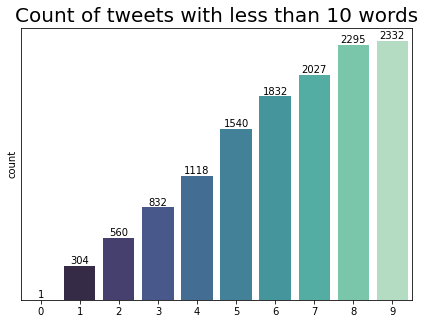

In [32]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [33]:
# checking long tweets
df.sort_values(by=['text_len'], ascending=False)

,text,sentiment,text_clean,text_len
44035,You so black and white trying to live like a n...,4,black white tri live like nigger pahahahaha co...,187
45165,"@hermdiggz: “@tayyoung_: FUCK OBAMA, dumb ass ...",4,fuck obama dumb ass nigger bitch ltthi whore s...,162
33724,"... I don't feel guilty for killing him, I jus...",2,feel guilti kill feel guilti enjoy torment sin...,137
1317,@EurekAlertAAAS: Researchers push to import to...,5,research push import top antibulli program us ...,137
47037,@Purely_Ambition: Sooo mad. RT @TracePeterson ...,4,sooo mad rt fuck obama dumb nigger go switzerl...,125
...,...,...,...,...
1607,@harmlesstree2 Here7 https://t.co/xWJzpSodGj,5,here7,1
6696,@LiamTighe Rebecca who?,5,rebecca,1
558,@root_tim this is my work :),5,work,1
3462,@jaredchase killing you how?,5,kill,1


### Removing tweets with less than 4 words and more than 100 words as they can be outliers

In [34]:
df = df[df['text_len'] > 3]
df = df[df['text_len'] < 100]

In [35]:
df

,text,sentiment,text_clean,text_len
0,"In other words #katandandre, your food was cra...",5,word katandandr food crapilici mkr,5
1,Why is #aussietv so white? #MKR #theblock #ImA...,5,aussietv white mkr theblock today sunris studi...,10
2,@XochitlSuckkks a classy whore? Or more red ve...,5,classi whore red velvet cupcak,5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",5,meh p thank head concern anoth angri dude twitter,9
4,@RudhoeEnglish This is an ISIS account pretend...,5,isi account pretend kurdish account like islam...,8
...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",4,black ppl expect anyth depend anyth yet free p...,21
47688,Turner did not withhold his disappointment. Tu...,4,turner withhold turner call court abomin concl...,28
47689,I swear to God. This dumb nigger bitch. I have...,4,swear god dumb nigger bitch got bleach hair re...,13
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,4,yea fuck rt your nigger fuck unfollow fuck dum...,10


## Turning text into numbers

In [43]:
#@title
from sklearn.preprocessing import LabelEncoder

lenc = LabelEncoder()
df.sentiment = lenc.fit_transform(df.sentiment)

for c in range(len(lenc.classes_)):
    string = ""
    for i in df[df.sentiment == c].text_clean.values:
        string = string + " " + i.strip()

In [44]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline


tfidf = TfidfTransformer()
clf = CountVectorizer()

X_cv =  clf.fit_transform(df['text_clean'])

tf_transformer = TfidfTransformer(use_idf=True).fit(X_cv)
X_tf = tf_transformer.transform(X_cv)

In [45]:
X_tf


<37114x32979 sparse matrix of type '<class 'numpy.float64'>'
	with 504608 stored elements in Compressed Sparse Row format>

## Train test split

In [46]:
from sklearn.model_selection import train_test_split
# train and test
X_train, X_test, y_train, y_test = train_test_split(X_tf, df['sentiment'], test_size=0.20, stratify=df['sentiment'], random_state=42)

In [47]:
y_train.value_counts()

0    6314
1    6264
3    6167
2    5849
4    5097
Name: sentiment, dtype: int64

In [48]:
pip install --upgrade threadpoolctl

Note: you may need to restart the kernel to use updated packages.


#### after checking the training set, there are imbalance of data and it may cause a bias in training the model. Oversampling using SMOTE will be used to balance the train dataset.

## SMOTE

In [49]:
from imblearn.over_sampling import SMOTE
vc = y_train.value_counts()
while (vc[0] != vc[4]) or (vc[0] !=  vc[2]) or (vc[0] !=  vc[3]) or (vc[0] !=  vc[1]):
    smote = SMOTE(sampling_strategy='minority')
    X_train, y_train = smote.fit_resample(X_train, y_train)
    vc = y_train.value_counts()

y_train.value_counts()

4    6314
0    6314
3    6314
2    6314
1    6314
Name: sentiment, dtype: int64

#### Now the training set is balanced and ready to be feed into the ml model

## Model Training

### Naive Bayes

In [50]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred, average='micro')
print("Precision :", precision)
recall = recall_score(y_test, y_pred, average='micro')
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred,average='micro')
print("F1-score  :", F1_score)


Accuracy   : 0.8526202344065742
Precision : 0.8526202344065742
Recall    : 0.8526202344065742
F1-score  : 0.8526202344065742


### Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rforest_pred = rf_clf.predict(X_test)
rforest_acc = accuracy_score(rforest_pred, y_test)
print("Test accuracy: {:.2f}%".format(rforest_acc*100))
precision = precision_score(y_test, rforest_pred, average='micro')
print("Precision :", precision)
recall = recall_score(y_test, rforest_pred, average='micro')
print("Recall    :", recall)
F1_score = f1_score(y_test, rforest_pred,average='micro')
print("F1-score  :", F1_score)

Test accuracy: 94.14%
Precision : 0.9413983564596524
Recall    : 0.9413983564596524
F1-score  : 0.9413983564596524


### Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, y_test)
print("Test accuracy: {:.2f}%".format(dtree_acc*100))
precision = precision_score(y_test, dtree_pred, average='micro')
print("Precision :", precision)
recall = recall_score(y_test, dtree_pred, average='micro')
print("Recall    :", recall)
F1_score = f1_score(y_test, dtree_pred,average='micro')
print("F1-score  :", F1_score)

Test accuracy: 91.94%
Precision : 0.9194395796847635
Recall    : 0.9194395796847635
F1-score  : 0.9194395796847635


### Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))
precision = precision_score(y_test, logreg_pred, average='micro')
print("Precision :", precision)
recall = recall_score(y_test, logreg_pred, average='micro')
print("Recall    :", recall)
F1_score = f1_score(y_test, logreg_pred,average='micro')
print("F1-score  :", F1_score)

Test accuracy: 92.62%
Precision : 0.9261754007813553
Recall    : 0.9261754007813553
F1-score  : 0.9261754007813553


### Ensemble of Decision Tree, Random Forest and Logistic Regression

In [102]:
from sklearn.metrics import log_loss
from sklearn.ensemble import VotingClassifier
final_model = VotingClassifier(
estimators=[('model1', dtree), ('model2', rf_clf),('model3',logreg)], voting='hard')
final_model.fit(X_train, y_train)
pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print("accuracy: {:.4f}%".format(accuracy*100))
precision = precision_score(y_test,pred, average='micro')
print("Precision :", precision)
recall = recall_score(y_test,pred, average='micro')
print("Recall    :", recall)
F1_score = f1_score(y_test,pred,average='micro')
print("F1-score  :", F1_score)


accuracy: 93.8973%
Precision : 0.9389734608648794
Recall    : 0.9389734608648794
F1-score  : 0.9389734608648794


### Extra Trees Classifier

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.datasets import make_classification
# X, y = make_classification(n_features=4, random_state=0)
extra_clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
extra_clf.fit(X_train, y_train)
#ExtraTreesClassifier(random_state=0)
#clf.predict([[0, 0, 0, 0]])
pred = extra_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print("accuracy: {:.4f}%".format(accuracy*100))

accuracy: 93.7087%


## AUC ROC Curve

In [169]:
# predict probabilities
pred_prob1 = nb_clf.predict_proba(X_test)
pred_prob2 = rf_clf.predict_proba(X_test)
pred_prob3 = dtree.predict_proba(X_test)
pred_prob4 = logreg.predict_proba(X_test)

In [170]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1,], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [146]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1,multi_class='ovr')
auc_score2 = roc_auc_score(y_test, pred_prob2,multi_class='ovr')
auc_score3 = roc_auc_score(y_test, pred_prob3,multi_class='ovr')
auc_score4 = roc_auc_score(y_test, pred_prob4,multi_class='ovr')

print("auc values {:.4f}".format(auc_score1))
print("auc values {:.4f}".format(auc_score2))
print("auc values {:.4f}".format(auc_score3))
print("auc values {:.4f}".format(auc_score4))

auc values 0.9803
auc values 0.9922
auc values 0.9476
auc values 0.9899


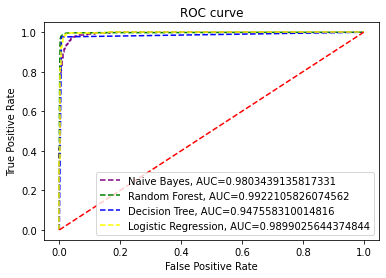

In [173]:
import matplotlib.pyplot as plt
plt.plot(fpr1,tpr1,linestyle='--', color='purple',label="Naive Bayes, AUC="+str(auc_score1))
plt.plot(fpr2,tpr2,linestyle='--',color='green',label="Random Forest, AUC="+str(auc_score2))
plt.plot(fpr3,tpr3,linestyle='--',color='blue',label="Decision Tree, AUC="+str(auc_score3))
plt.plot(fpr4,tpr4,linestyle='--', color='yellow',label="Logistic Regression, AUC="+str(auc_score4))
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#add legend
plt.legend()